In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [8]:
# Step 2: Load the dataset
# Replace 'Real-estate-valuation-data-set.csv' with the correct file path if needed
data = pd.read_csv('Real estate valuation data set.csv')
# Display the first few rows of the dataset to understand its structure
print(data.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [9]:
# Step 3: Data preprocessing
# Drop unnecessary columns: 'No' (index) and 'Y house price of unit area' (target variable), this because Y house price is labeled and unsupervised which clustering use no labeling 
X = data.drop(['No', 'Y house price of unit area'], axis=1)

# Standardize the features to bring them to the same scale (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

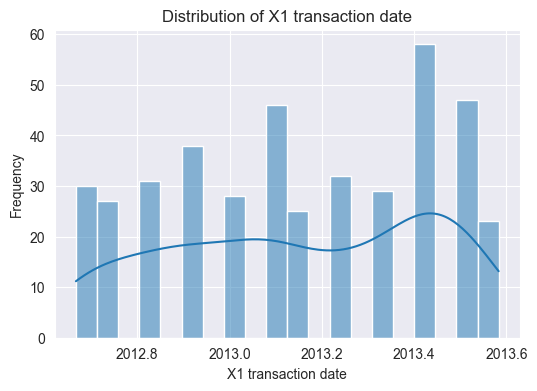

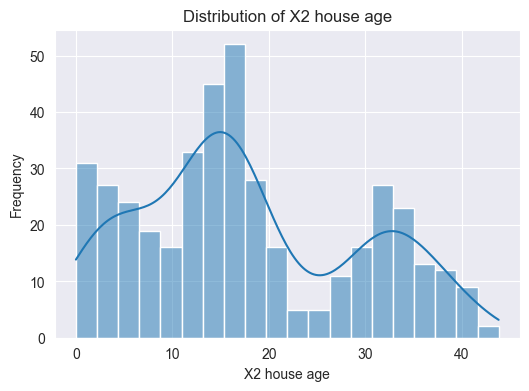

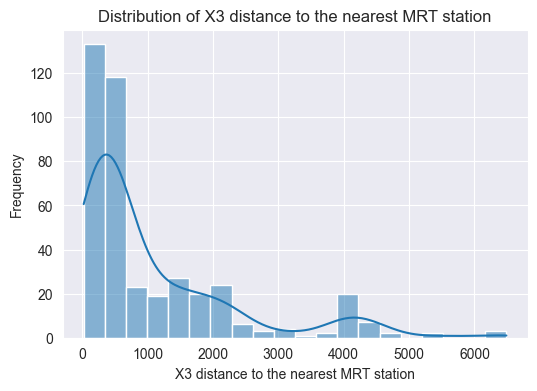

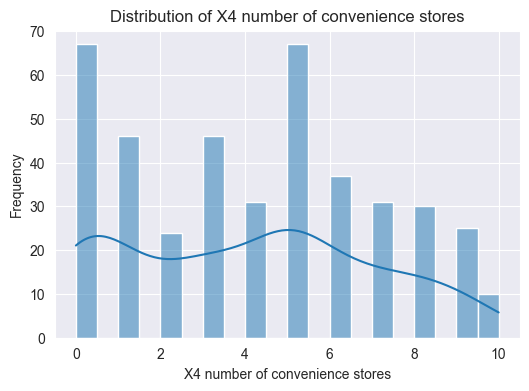

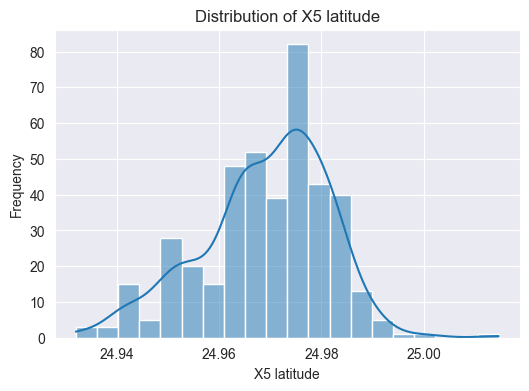

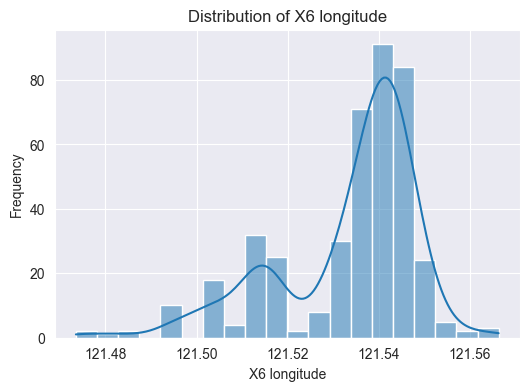

In [10]:
# Step 4: Visualize attribute distributions
#  Plot histograms with density curves for each feature to understand their distributions.
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

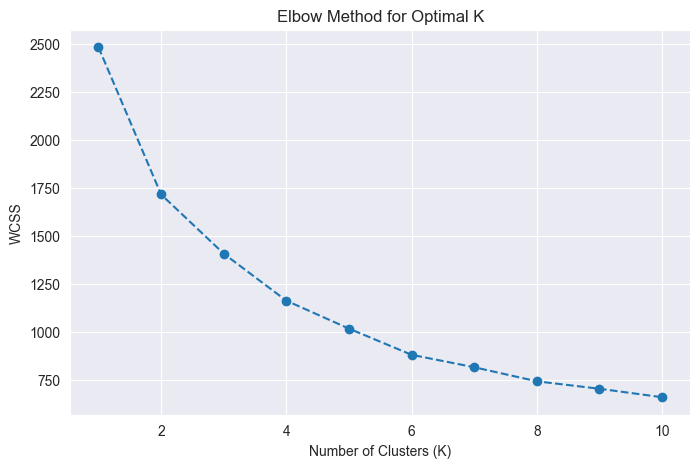

In [16]:
# Step 5: Determine the optimal number of clusters using the elbow method
#Plot WCSS vs K to find the "elbow point," which suggests the optimal number of clusters, Calculate Within-Cluster Sum of Squares (WCSS) for K=[1,10]

wcss = []  # Within-cluster sum of squares
# Test cluster counts from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph to visualize WCSS vs. number of clusters (K)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()




In [17]:
# Step 6: Apply K-Means clustering with the chosen number of clusters

# Based on the elbow method graph, choose an optimal number of clusters (e.g., K=3)
#K=3 is optimal, you see a significant drop in WCSS up to K=3 then smaller drops afterward.
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset for analysis
data['Cluster'] = clusters


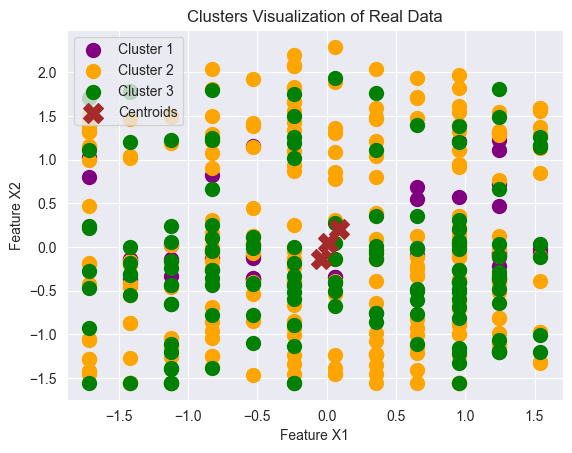

Clustering completed. Results saved to 'Real-estate-clustered.csv'.


In [19]:
# Step 7: Visualize clusters 2D (using first two features for simplicity)
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='brown', marker='X', label='Centroids')
plt.title('Clusters Visualization of Real Data')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.show()

# Optional: Save results to a CSV file for further analysis or submission
data.to_csv('Real-estate-clustered.csv', index=False)

print("Clustering completed. Results saved to 'Real-estate-clustered.csv'.")

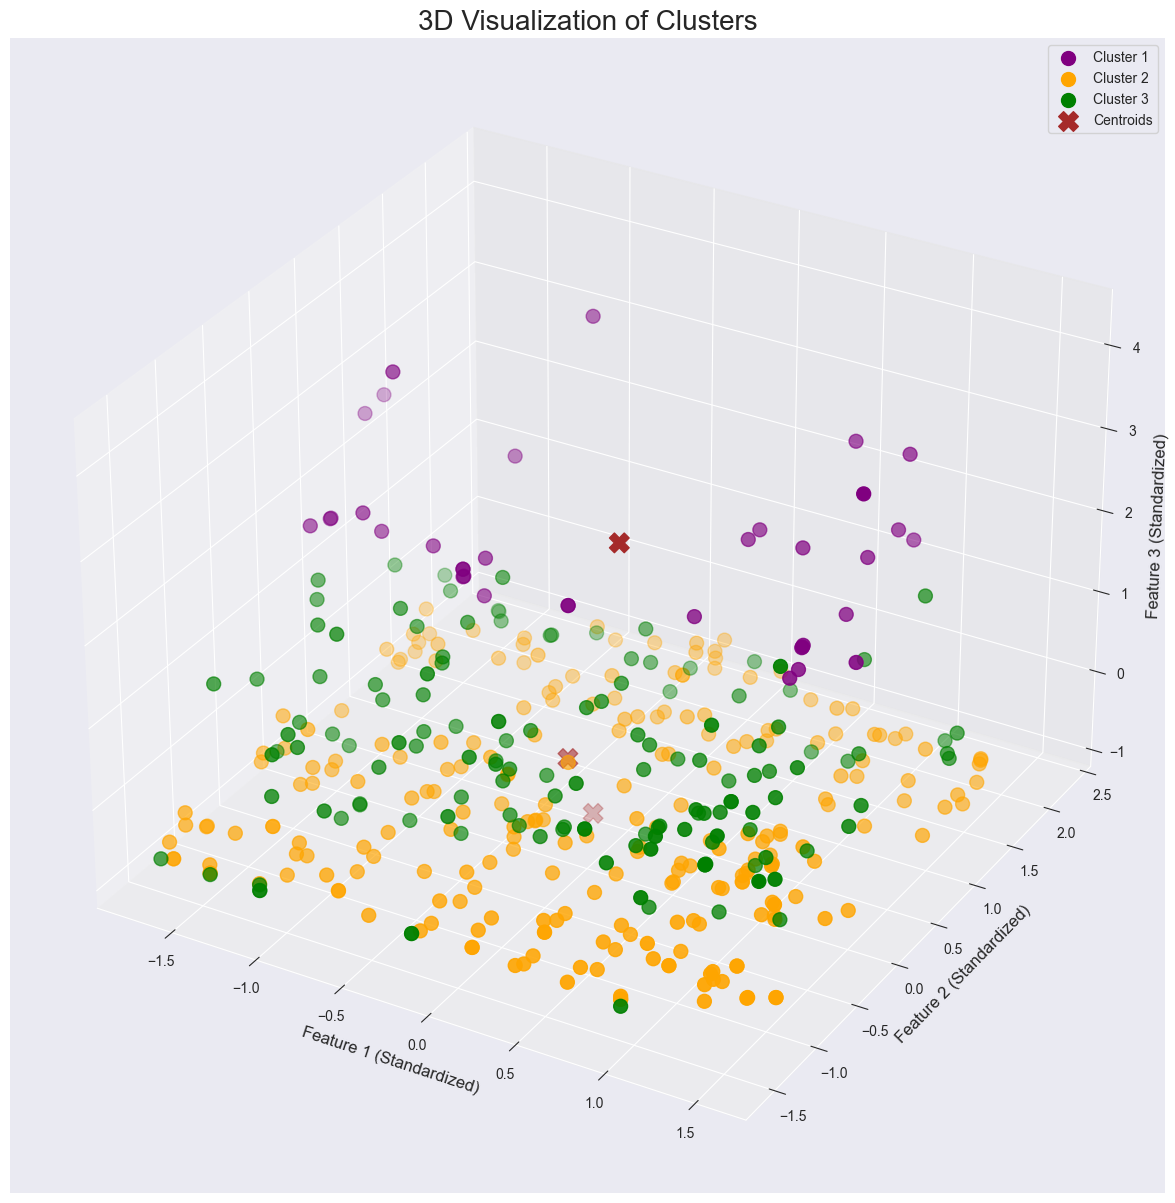

In [15]:
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Visualizing the clusters
ax.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], X_scaled[clusters == 0, 2],
           s=100, c='purple', label='Cluster 1')
ax.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], X_scaled[clusters == 1, 2],
           s=100, c='orange', label='Cluster 2')
ax.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], X_scaled[clusters == 2, 2],
           s=100, c='green', label='Cluster 3')

# Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           s=200, c='brown', marker='X', label='Centroids')

# Adding labels and legend
ax.set_title('3D Visualization of Clusters', fontsize=20)
ax.set_xlabel('Feature 1 (Standardized)', fontsize=12)
ax.set_ylabel('Feature 2 (Standardized)', fontsize=12)
ax.set_zlabel('Feature 3 (Standardized)', fontsize=12)
ax.legend()

# Show the plot
plt.show()
#Visualize clusters in a three-dimensional space using three features.
#A scatter plot where points are grouped into clusters in a visually distinct manner.

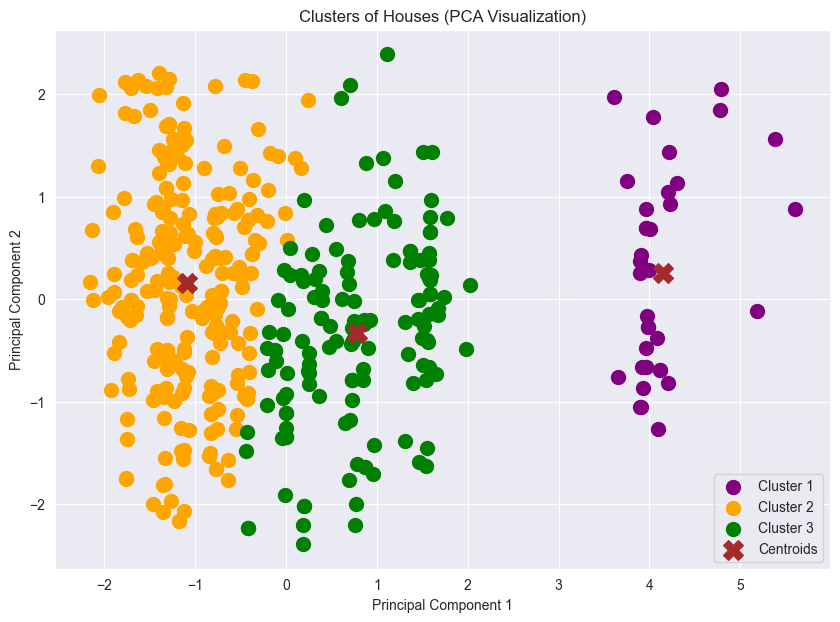

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Real estate valuation data set.csv')

# Drop irrelevant columns and target variable
X = data.drop(['No', 'Y house price of unit area'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering with an optimal number of clusters (e.g., K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize the clusters in 2D using PCA components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[clusters == 0, 0], X_pca[clusters == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(X_pca[clusters == 1, 0], X_pca[clusters == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X_pca[clusters == 2, 0], X_pca[clusters == 2, 1], s=100, c='green', label='Cluster 3')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='brown', marker='X', label='Centroids')

# Add labels and title
plt.title('Clusters of Houses (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()